In [1]:
#Importar todas las librerías que se utilizaran
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st

In [2]:
df_games = pd.read_csv('/datasets/games.csv')

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# Reemplazar nombres de columnas por minúsculas.
df_games.columns = df_games.columns.str.lower()


In [6]:
#Se buscan datos ausentes en columna nombre del juego.
df_games[df_games['name'].isnull()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
df_games.dropna(subset=['name'], inplace=True)


In [8]:
df_games[df_games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
df_games.dropna(subset=['year_of_release'], inplace=True)
df_games['year_of_release'] = df_games['year_of_release'].astype(int)

In [10]:
df_games[df_games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [11]:
df_games[df_games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
df_games[df_games['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
df_games[df_games['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
df_games['rating'] = df_games['rating'].fillna('unknow')

In [15]:
df_games['rating'].value_counts()

unknow    6676
E         3921
T         2905
M         1536
E10+      1393
EC           8
K-A          3
RP           1
AO           1
Name: rating, dtype: int64

In [16]:
df_games['rating'] = df_games['rating'].replace('EC', 'E')
df_games['rating'] = df_games['rating'].replace('K-A', 'E')
df_games['rating'] = df_games['rating'].replace('AO', 'M')
df_games['rating'] = df_games['rating'].replace('RP', 'unknow')

In [17]:
df_games['rating'].value_counts()

unknow    6677
E         3932
T         2905
M         1537
E10+      1393
Name: rating, dtype: int64

Para la columna rating se verificaron valores ausentes y estos fueron reemplazados por la palabra 'unknow' ya que puede deberse a que son juegos que aún no han sido clasificados. Además se investigó las clasificaciones de la ESRB y se descubrio que en los datos hay clasificaciones redundantes que se podrían agrupar en una sola, este es el caso de EC que se agrupo con E y K-A que igual se agrupo con E, también AO se agrupó con M y rp que estaban pendientes de evaluación se agruparon junto con los valores desconocidos.
Este cambio simplifica la interpretación y disminuye la cantidad de variables para rating haciendolo más preciso.

In [18]:
# Valores TBD
df_games[df_games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [19]:
#Convertir valores TBD a NaN
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan )



In [20]:
df_games['user_score'] = df_games['user_score'].astype('float')

In [21]:
#Total_sales

df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknow,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknow,31.38


In [22]:
#Por qué los valores están ausentes?

In [23]:
# Juegos lanzados por año
games_per_year = df_games.groupby('year_of_release')['name'].count()
print(games_per_year)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


In [24]:
#Ventas entre plataformas
sales_by_platform = df_games.groupby('platform')['total_sales'].sum()
sales_sort = sales_by_platform.sort_values(ascending=False)
print(sales_sort)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


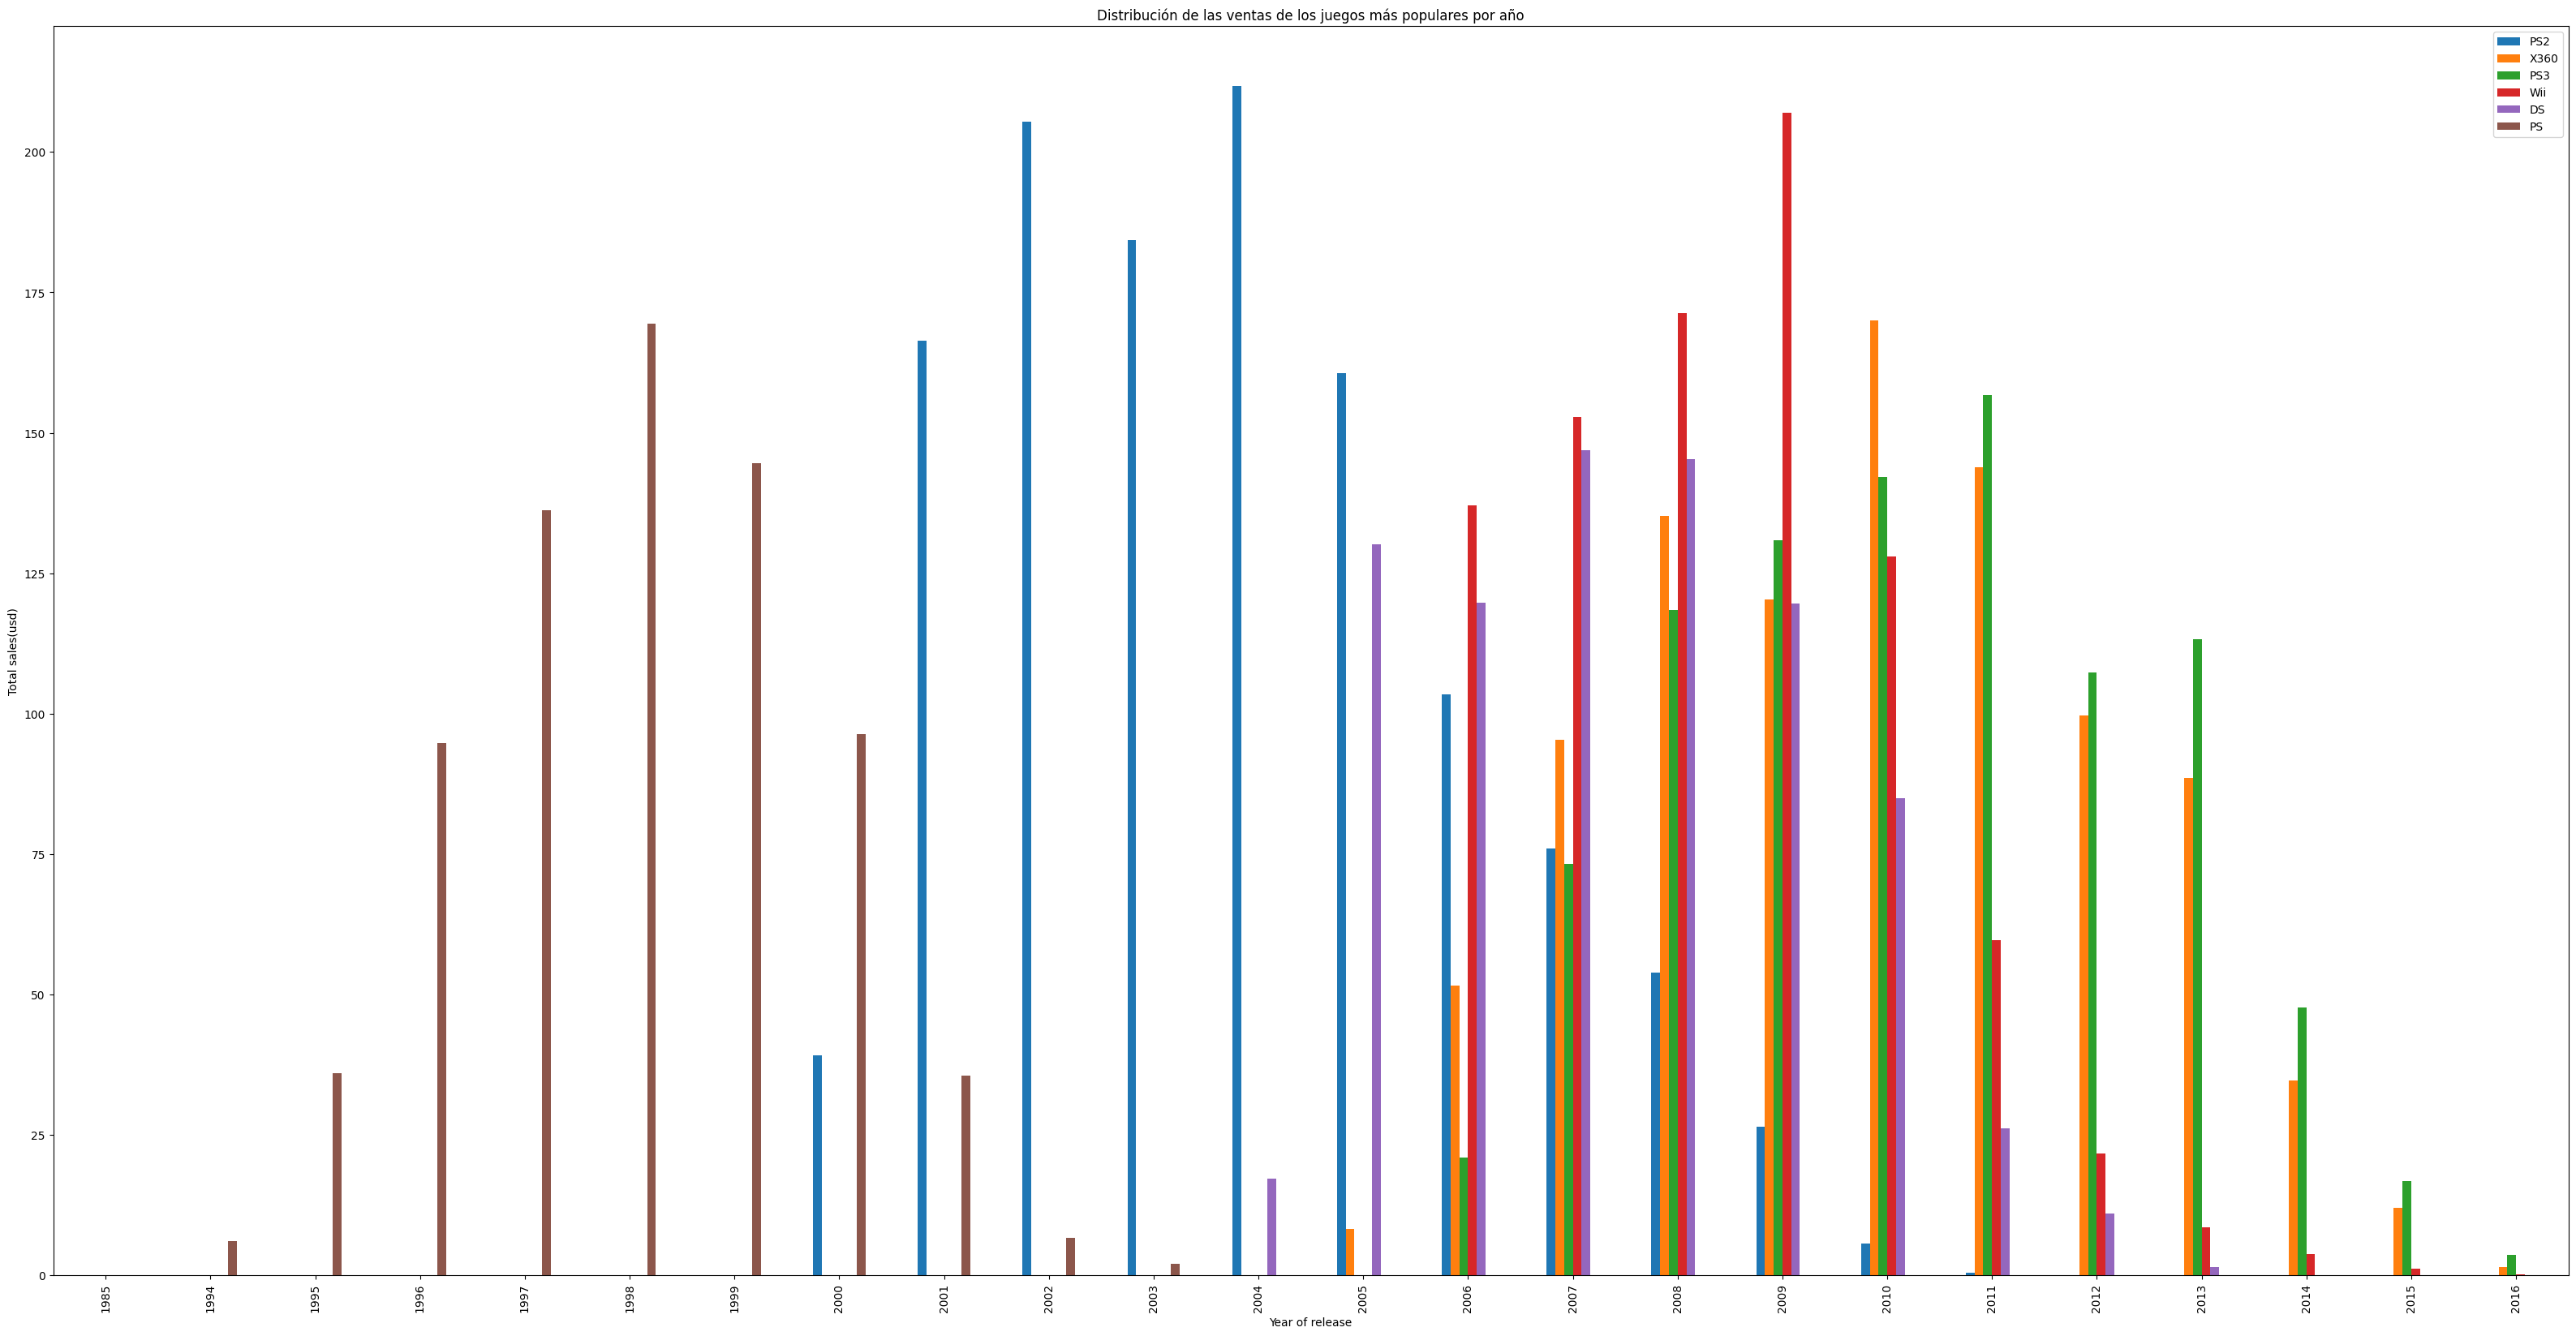

In [25]:
#Distribución de datos por año
PS2_INFO = df_games[df_games['platform'] == 'PS2'].groupby('year_of_release')['total_sales'].sum()
X360_INFO = df_games[df_games['platform'] == 'X360'].groupby('year_of_release')['total_sales'].sum()
PS3_INFO = df_games[df_games['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum()
WII_INFO = df_games[df_games['platform'] == 'Wii'].groupby('year_of_release')['total_sales'].sum()
DS_INFO = df_games[df_games['platform'] == 'DS'].groupby('year_of_release')['total_sales'].sum()
PS_INFO = df_games[df_games['platform'] == 'PS'].groupby('year_of_release')['total_sales'].sum()

merged_data = pd.concat([PS2_INFO, X360_INFO, PS3_INFO, WII_INFO, DS_INFO, PS_INFO ], axis=1).plot(kind='bar', figsize=(40,20), xlabel='Year of release', ylabel='Total sales(usd)', title='Distribución de las ventas de los juegos más populares por año')
plt.legend(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])

In [26]:
#Plataformas populares que ahora no presentan ventas.
pop_platforms = df_games.groupby(['year_of_release', 'platform'])['total_sales'].sum()
pop_platforms.sort_values(ascending=False).reset_index().head(20)

,year_of_release,platform,total_sales
0,2004,PS2,211.81
1,2009,Wii,206.97
2,2002,PS2,205.38
3,2003,PS2,184.31
4,2008,Wii,171.32
5,2010,X360,170.03
6,1998,PS,169.49
7,2001,PS2,166.43
8,2005,PS2,160.66
9,2011,PS3,156.78


In [27]:
# Plataformas líderes en ventas
#Primero seleccionar los datos a utilizar filtrando por año
data_per_year = df_games[(df_games['year_of_release'] >= 2014) & (df_games['year_of_release'] <= 2016)]
#Ventas de cada plataforma en estos años
sales = data_per_year.groupby('platform')['total_sales'].sum()
sales_sorted = sales.sort_values(ascending=False)
print(sales_sorted)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64


In [28]:
#Plataformas a través del los años 2015-2016

#PS4
PS4 = data_per_year[data_per_year['platform'] == 'PS4'].groupby('year_of_release')['total_sales'].sum()

In [29]:
#XOne
XONE = data_per_year[data_per_year['platform'] == 'XOne'].groupby('year_of_release')['total_sales'].sum()

In [30]:
#3ds

DS3 = data_per_year[data_per_year['platform'] == '3DS'].groupby('year_of_release')['total_sales'].sum()

In [31]:
#ps3
PS3 = data_per_year[data_per_year['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum()

In [32]:
#x360
X360 =data_per_year[data_per_year['platform'] == 'X360'].groupby('year_of_release')['total_sales'].sum()

In [33]:
# WiiU
WIIU = data_per_year[data_per_year['platform'] == 'WiiU'].groupby('year_of_release')['total_sales'].sum()

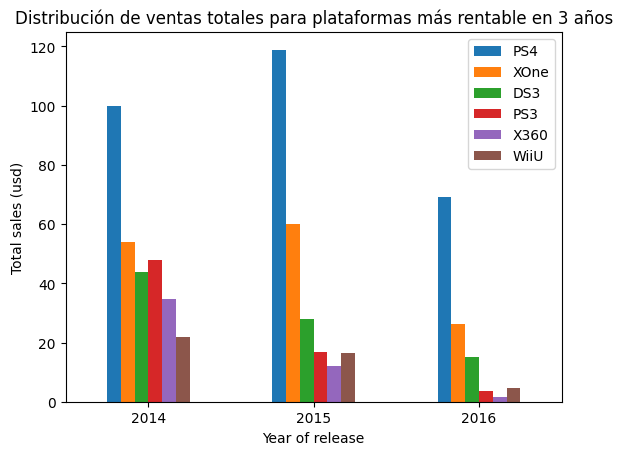

In [34]:
merge_1 = pd.concat([PS4, XONE, DS3, PS3, X360, WIIU], axis=1).plot(kind='bar', ylabel='Total sales (usd)', xlabel='Year of release', title='Distribución de ventas totales para plataformas más rentable en 3 años', rot=360)
plt.legend(['PS4', 'XOne', 'DS3', 'PS3', 'X360', 'WiiU'])


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

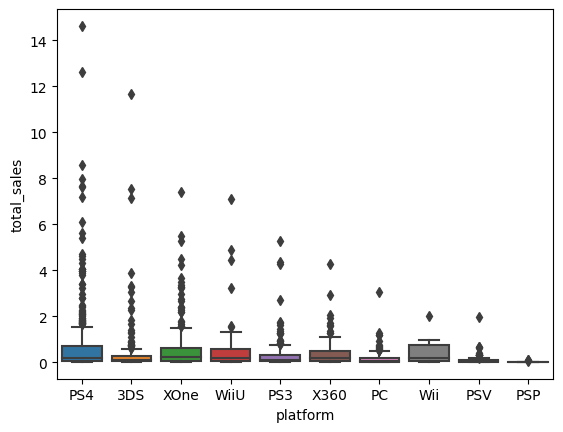

In [35]:
#Ventas globales de todos los juegos por plataforma

sns.boxplot(data=data_per_year, x='platform', y='total_sales' )

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

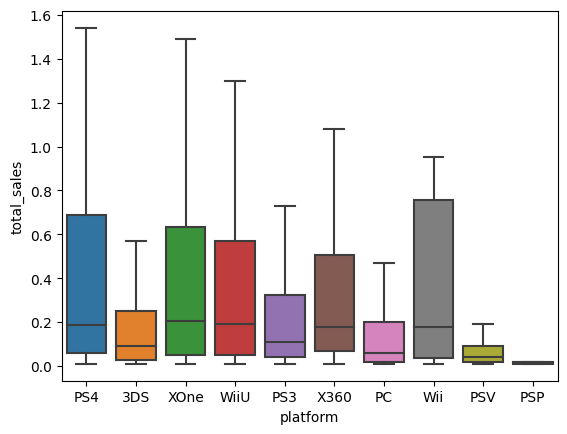

In [36]:
#Ventas globales de todos los juegos por plataforma(se quitan los outliers para interpretación)
sns.boxplot(data=data_per_year, x= 'platform', y='total_sales', showfliers=False)

In [37]:
#Media para cada plataforma más popular
#(ps4, xone, ds3, ps3, x360, wiiU)
data_per_year.groupby('platform')['total_sales'].mean().sort_values(ascending=False)


platform
PS4     0.766356
XOne    0.615614
WiiU    0.588767
Wii     0.460909
X360    0.434414
3DS     0.408868
PS3     0.311324
PC      0.179139
PSV     0.075932
PSP     0.027692
Name: total_sales, dtype: float64

In [38]:
#Varianza para las plataformas
data_per_year.groupby('platform')['total_sales'].var().sort_values(ascending=False)

platform
PS4     2.608124
3DS     1.412219
WiiU    1.349005
XOne    1.095189
PS3     0.400764
X360    0.395599
Wii     0.391189
PC      0.108477
PSV     0.020048
PSP     0.000769
Name: total_sales, dtype: float64

-0.040131589472697356


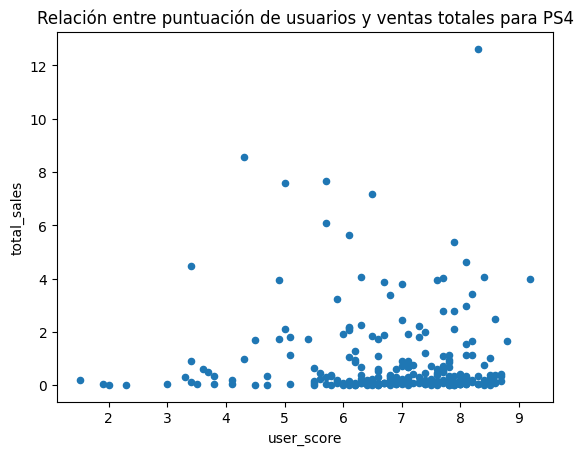

In [39]:
#ps4 usuarios
ps4_data = data_per_year[data_per_year['platform'] == 'PS4']
ps4_data.plot(x='user_score', y='total_sales', kind='scatter', title='Relación entre puntuación de usuarios y ventas totales para PS4')
corr_score_sales_ps4 = ps4_data['user_score'].corr(ps4_data['total_sales'])
print(corr_score_sales_ps4)

0.40266141068104083

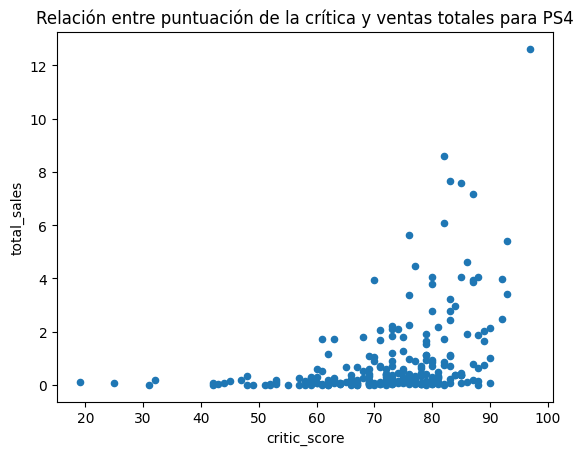

In [40]:
#ps4 critic.
ps4_data.plot(x='critic_score', y='total_sales', kind='scatter', title='Relación entre puntuación de la crítica y ventas totales para PS4')
ps4_data['critic_score'].corr(ps4_data['total_sales'])

-0.0703839280647581

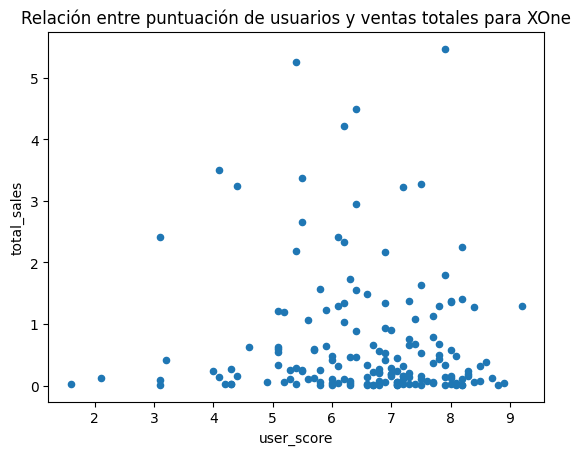

In [41]:
# xone
xone_data = data_per_year[data_per_year['platform'] == 'XOne']
xone_data.plot(x='user_score', y='total_sales', kind='scatter', title='Relación entre puntuación de usuarios y ventas totales para XOne')
xone_data['user_score'].corr(xone_data['total_sales'])

0.42867694370333226

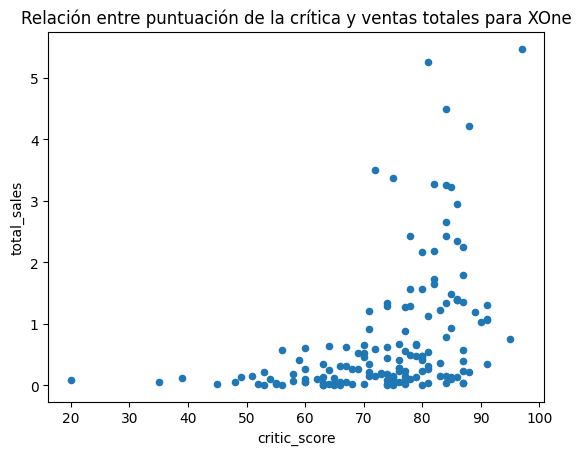

In [42]:
#xone critic

xone_data.plot(x='critic_score', y='total_sales', kind='scatter', title='Relación entre puntuación de la crítica y ventas totales para XOne')
xone_data['critic_score'].corr(xone_data['total_sales'])

0.2151932718527028

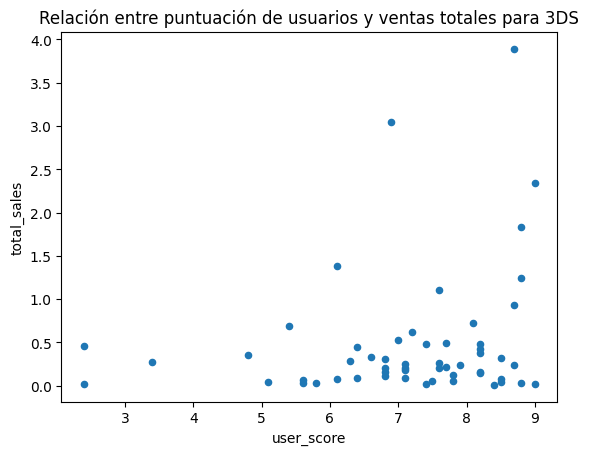

In [43]:
#ds3 user
ds3_data = data_per_year[data_per_year['platform'] == '3DS']
ds3_data.plot(x='user_score', y='total_sales', kind='scatter', title='Relación entre puntuación de usuarios y ventas totales para 3DS')
ds3_data['user_score'].corr(ds3_data['total_sales'])

0.314117492869051

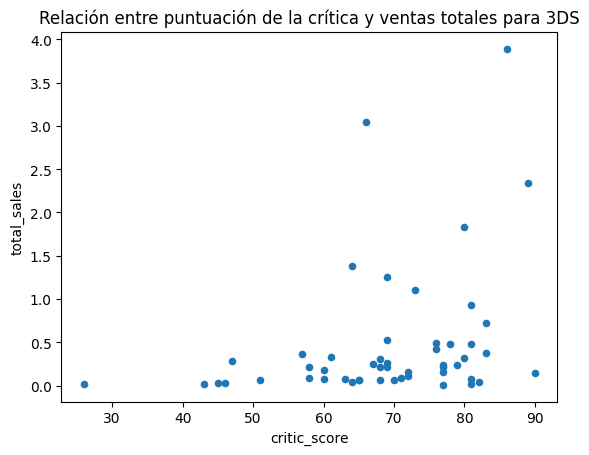

In [44]:
#ds3 critic
ds3_data.plot(x='critic_score', y='total_sales', kind='scatter', title='Relación entre puntuación de la crítica y ventas totales para 3DS')
ds3_data['critic_score'].corr(ds3_data['total_sales'])

In [45]:
#Distribución por género
data_per_year.groupby('genre')['name'].count().sort_values(ascending=False)


genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

In [46]:
data_per_year.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

In [47]:
# 1 Platafomras principales por región

#NA
data_per_year.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

In [48]:
#EU
data_per_year.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

In [49]:
#jp
data_per_year.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

In [50]:
# Géneros principales
#NA
data_per_year.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

In [51]:
#EU
data_per_year.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

In [52]:
#JP
data_per_year.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

In [53]:
#Clasificación ESRB afecta ventas en regiones
#NA
data_per_year.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
M         96.42
unknow    64.72
E         50.74
T         38.95
E10+      33.23
Name: na_sales, dtype: float64

In [54]:
#eu
data_per_year.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
M         93.44
unknow    58.95
E         58.06
T         34.07
E10+      26.16
Name: eu_sales, dtype: float64

In [55]:
#jp
data_per_year.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
unknow    56.90
T         14.78
E          8.94
M          8.01
E10+       4.46
Name: jp_sales, dtype: float64

In [56]:
#Pruebas de hipótesis.
#1- Las clasificaciones promedio de los usuarios para las plataformas xbox one y pc son las mismas
xbox_one = data_per_year.loc[data_per_year['platform'] == 'XOne', 'user_score'].dropna()
pc = data_per_year.loc[data_per_year['platform'] == 'PC', 'user_score'].dropna()

alpha = 0.05

hipotesis_1 = st.ttest_ind(xbox_one, pc, equal_var=False)
print('valor_p:', hipotesis_1.pvalue)

if hipotesis_1.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No podemos rechazar hipótesis nula')

valor_p: 0.11601398086668832
No podemos rechazar hipótesis nula


Obseervaciones
La hipótesis nula sería que ambas plataformas no muestran diferencias.
La hipótesis alternativa sería que ambas plataformas si muestran diferencias.
Para probar la hipótesis se ultizó un alpha de 0.05 y se fijó equal_var en False asumiendo que las varianzas son diferentes de acuerdo a los datos obtenidos anteriormente.
 Se obtuvo que no se puede rechazar la hipótesis nula lo cual significa que no podemos descartat que ambas plataformas no tengan diferencias significativas



In [57]:
# 2 Las calificaciones promedio de los ususarios para los géneros acción y deportes son diferentes

accion = data_per_year.loc[data_per_year['genre'] == 'Action', 'user_score'].dropna()
deportes = data_per_year.loc[data_per_year['genre'] == 'Sports', 'user_score'].dropna()

hipotesis_2 = st.ttest_ind(accion, deportes, equal_var=False)
print('valor_p:', hipotesis_2.pvalue)

if hipotesis_2.pvalue < alpha:
    print('Se rechaza hipótesis nula')
else:
    print('No podemos rechazar hipótesis nula')



valor_p: 1.1825550382644557e-14
Se rechaza hipótesis nula
